In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
cd /content/drive/My Drive

/content/drive/My Drive


In [0]:
ls


'=0.3.2'
 394499700164290_signed.pdf
 C8_Chethan.vcf
'Colab Notebooks'/
'Getting started.pdf'
 glove.6B.100d.txt
 glove.6B.200d.txt
 glove.6B.300d.txt
 glove.6B.50d.txt
 glove.6B.zip
'gods Resume.pdf'
 Hotel_Reviews-515k-hotel-reviews-data-in-europe.csv
 Hotel_Reviews.csv
 model.h5
 model_han_.hdf5
'open?id=1-3pRKdLxcIpMCjUFaD1ci4OwUtFuJd3J'
'open?id=1en5jXle_cW1XTksKKoP3RBa9Nki4J9xp'
'open?id=1en5jXle_cW1XTksKKoP3RBa9Nki4J9xp.1'
'open?id=1en5jXle_cW1XTksKKoP3RBa9Nki4J9xp.2'
'open?id=1xzt06g_xeP1DitFXhJprF5VTwzNEUYhq'
'open?id=1xzt06g_xeP1DitFXhJprF5VTwzNEUYhq.1'
'open?id=1xzt06g_xeP1DitFXhJprF5VTwzNEUYhq.2'
'open?id=1xzt06g_xeP1DitFXhJprF5VTwzNEUYhq.3'
'open?id=1xzt06g_xeP1DitFXhJprF5VTwzNEUYhq.4'
 Resume12.gdoc
 Resume12.pdf
'Resume (1).gdoc'
'Resume (2).gdoc'
'Resume (3).gdoc'
 Resume.gdoc
 wiki-news-300d-1M.vec
 wiki-news-300d-1M.vec.zip


In [0]:
import os
import sys
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

from gensim.models import KeyedVectors


Using TensorFlow backend.


In [0]:
reviews_df = pd.read_csv('Hotel_Reviews.csv')
print(reviews_df.dtypes)

Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
Tags                                           object
days_since_review                              object
lat                                           float64
lng                                           float64
dtype: object


In [0]:
def clean(text):
    '''
    '''
    text = text.lower()
    text = text.replace("ain't", "am not")
    text = text.replace("aren't", "are not")
    text = text.replace("can't", "cannot")
    text = text.replace("can't've", "cannot have")
    text = text.replace("'cause", "because")
    text = text.replace("could've", "could have")
    text = text.replace("couldn't", "could not")
    text = text.replace("couldn't've", "could not have")
    text = text.replace("should've", "should have")
    text = text.replace("should't", "should not")
    text = text.replace("should't've", "should not have")
    text = text.replace("would've", "would have")
    text = text.replace("would't", "would not")
    text = text.replace("would't've", "would not have")
    text = text.replace("didn't", "did not")
    text = text.replace("doesn't", "does not")
    text = text.replace("don't", "do not")
    text = text.replace("hadn't", "had not")
    text = text.replace("hadn't've", "had not have")
    text = text.replace("hasn't", "has not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("he'd", "he would")
    text = text.replace("haven't", "have not")
    text = text.replace("he'd've", "he would have")
    text = text.replace("'s", "")
    text = text.replace("'t", "")
    text = text.replace("'ve", "")
    text = text.replace(".", " . ")
    text = text.replace("!", " ! ")
    text = text.replace("?", " ? ")
    text = text.replace(";", " ; ")
    text = text.replace(":", " : ")
    text = text.replace(",", " , ")
    text = text.replace("´", "")
    text = text.replace("‘", "")
    text = text.replace("’", "")
    text = text.replace("“", "")
    text = text.replace("”", "")
    text = text.replace("\'", "")
    text = text.replace("\"", "")
    text = text.replace("-", "")
    text = text.replace("–", "")
    text = text.replace("—", "")
    text = text.replace("[", "")
    text = text.replace("]","")
    text = text.replace("{","")
    text = text.replace("}", "")
    text = text.replace("/", "")
    text = text.replace("|", "")
    text = text.replace("(", "")
    text = text.replace(")", "")
    text = text.replace("$", "")
    text = text.replace("+", "")
    text = text.replace("*", "")
    text = text.replace("%", "")
    text = text.replace("#", "")
    text = text.replace("\n", " \n ")
    text = text.replace("\n", "")
    text = text.replace("_", " _ ")
    text = text.replace("_", "")
    text = ''.join([i for i in text if not i.isdigit()])

    return text

In [0]:
positive_reviews = reviews_df['Positive_Review'].values
negative_reviews = reviews_df['Negative_Review'].values


In [0]:
cleaned_positive_reviews = [clean(r) for r in positive_reviews] 
cleaned_negative_reviews = [clean(r) for r in negative_reviews] 

In [0]:
reviews_df['Positive_Review'] = cleaned_positive_reviews
reviews_df['Negative_Review'] = cleaned_negative_reviews

In [0]:
# Shuffling data
reviews_df = reviews_df.sample(frac=1).reset_index(drop=True)

# Extracting all text
positive_reviews = reviews_df['Positive_Review'].values
negative_reviews = reviews_df['Negative_Review'].values
reviews_text = []

for p,n in zip(positive_reviews, negative_reviews) : 
    if p in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] : 
        reviews_text.append(n)
    elif n in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] : 
        reviews_text.append(p)
    else : 
        reviews_text.append(n)
        reviews_text.append(p)

In [0]:
training_df = reviews_df.loc[:10000]
positive_reviews_filtered = training_df['Positive_Review'].values
negative_reviews_filtered = training_df['Negative_Review'].values
training_reviews = []
labels = []

for idx,(p,n) in enumerate(zip(positive_reviews_filtered, negative_reviews_filtered)) : 
    if p in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] : 
        training_reviews.append(n)
        labels.append(0)
    elif n in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        training_reviews.append(p)
        labels.append(1)
    else :
        training_reviews.append(n)
        labels.append(0)
        training_reviews.append(p)
        labels.append(1)

In [0]:
dict1 ={
    'reviews' : training_reviews,
    'labels' : labels
}
sentiment_df = pd.DataFrame.from_dict(dict1)

In [0]:
dict2 ={
    'reviews_text' : reviews_text
}
reviews_text_df = pd.DataFrame.from_dict(dict2)

In [0]:
import numpy as np
import pandas as pd
import pickle
from collections import defaultdict
import re
from bs4 import BeautifulSoup
import sys
import os
os.environ['KERAS_BACKEND']='theano'
from keras.preprocessing.text import Tokenizer,text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Embedding
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout, LSTM, GRU, Bidirectional, TimeDistributed
from keras.models import Model
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
plt.switch_backend('agg')
from keras import backend as K
from keras.engine.topology import Layer, InputSpec
from keras import initializers
%matplotlib inline

In [0]:
def clean_str(string):
    string = re.sub(r"\\", "", string)
    string = re.sub(r"\'", "", string)
    string = re.sub(r"\"", "", string)
    return string.strip().lower()

In [0]:
MAX_SENT_LENGTH = 100
MAX_SENTS = 15
MAX_NB_WORDS = 20000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2

In [0]:
sentiment_df = sentiment_df.dropna()
sentiment_df = sentiment_df.reset_index(drop=True)
print('Shape of dataset ',sentiment_df.shape)
print(sentiment_df.columns)
print('No. of unique classes',len(set(sentiment_df['labels'])))

Shape of dataset  (16784, 2)
Index(['reviews', 'labels'], dtype='object')
No. of unique classes 2


In [0]:
import nltk
from nltk import tokenize

reviews = []
labels = []
texts = []

In [0]:
macronum=sorted(set(sentiment_df['labels']))
macro_to_id = dict((note, number) for number, note in enumerate(macronum))

In [0]:
def fun(i):
    return macro_to_id[i]

sentiment_df['labels']=sentiment_df['labels'].apply(fun)

In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
for i in range(sentiment_df.reviews.shape[0]):
    text = BeautifulSoup(sentiment_df.reviews[i])
    text=clean_str(str(text.get_text().encode()).lower())
    texts.append(text)
    sentences = tokenize.sent_tokenize(text)
    reviews.append(sentences)


for i in sentiment_df['labels']:
    labels.append(i)

In [0]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)

data = np.zeros((len(texts), MAX_SENTS, MAX_SENT_LENGTH), dtype='int32')

for i, sentences in enumerate(reviews):
    for j, sent in enumerate(sentences):
        if j< MAX_SENTS:
            wordTokens = text_to_word_sequence(sent)
            k=0
            for _, word in enumerate(wordTokens):
                if k<MAX_SENT_LENGTH and tokenizer.word_index[word]<MAX_NB_WORDS:
                    data[i,j,k] = tokenizer.word_index[word]
                    k=k+1

In [0]:
word_index = tokenizer.word_index
print('No. of %s unique tokens.' % len(word_index))

No. of 11822 unique tokens.


In [0]:
labels = to_categorical(np.asarray(labels))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)


indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
#labels = labels[indices]
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

Shape of data tensor: (16784, 15, 100)
Shape of label tensor: (16784, 2)


In [0]:
x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]

In [0]:
import pickle
import itertools
import gensim
from sklearn.model_selection import train_test_split
from numpy import zeros
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from gensim.models import Word2Vec
text_reviews = [str(r) for r in reviews_text_df['reviews_text'].values]
sentences = []

for review in text_reviews:
    words = text_to_word_sequence(review)
    sentences.append(words)

embeddings_model = Word2Vec(sentences, min_count=1, sg=1, size=128)
words = list(embeddings_model.wv.vocab)
print('{} WORDS '.format(len(words)))
print('Printing first 100:')
print(words[:100])

76904 WORDS 
Printing first 100:
['the', 'room', 'had', 'a', 'bad', 'smell', 'when', 'we', 'entered', 'staff', 'on', 'reception', 'were', 'rather', 'brisk', 'unfriendly', 'to', 'say', 'least', 'i', 'feel', 'you', 'can', 'get', 'more', 'for', 'your', 'money', 'elsewhere', 'in', 'terms', 'of', 'what', 'paid', 'loved', 'location', 'hotel', 'bar', 'lovely', 'beds', 'comfy', 'and', 'shower', 'was', 'great', 'free', 'wifi', 'very', 'poor', 'ok', 'area', 'but', 'not', 'bedrooms', 'west', 'although', 'there', 'is', 'happy', 'hour', 'still', 'way', 'too', 'expensive', 'works', 'out', 'at', 'pint', 'no', 'draught', 'beers', 'either', 'surprised', 'it', 'empty', 'gets', 'busy', 'breakfast', 'good', 'helpful', 'could', 'have', 'been', 'friendlier', 'think', 'should', 'little', 'extra', 'touches', 'make', 'all', 'difference', 'clean', 'team', 'so', 'slowly', 'they', 'charged', 'me', 'by']


In [0]:
!wget https://drive.google.com/open?id=1xzt06g_xeP1DitFXhJprF5VTwzNEUYhq
!unzip wiki-news-300d-1M.vec.zip

--2020-05-19 14:57:34--  https://drive.google.com/open?id=1xzt06g_xeP1DitFXhJprF5VTwzNEUYhq
Resolving drive.google.com (drive.google.com)... 108.177.126.100, 108.177.126.138, 108.177.126.101, ...
Connecting to drive.google.com (drive.google.com)|108.177.126.100|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://drive.google.com/file/d/1xzt06g_xeP1DitFXhJprF5VTwzNEUYhq/view?usp=drive_open [following]
--2020-05-19 14:57:35--  https://drive.google.com/file/d/1xzt06g_xeP1DitFXhJprF5VTwzNEUYhq/view?usp=drive_open
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘open?id=1xzt06g_xeP1DitFXhJprF5VTwzNEUYhq.5’

open?id=1xzt06g_xeP     [ <=>                ]  68.38K  --.-KB/s    in 0.03s   

2020-05-19 14:57:35 (2.40 MB/s) - ‘open?id=1xzt06g_xeP1DitFXhJprF5VTwzNEUYhq.5’ saved [70019]

Archive:  wiki-news-300d-1M.vec.zip
replace wiki-news-300d-1M.vec? [y]e

In [0]:
model_ft = KeyedVectors.load_word2vec_format('wiki-news-300d-1M.vec', binary=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
EMBEDDING_DIM = 300
MAX_NUM_WORDS=11823
print('Preparing embedding matrix.fast text')

# prepare embedding matrix
num_words = min(MAX_NUM_WORDS, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
    if word in model_ft.vocab:
      embedding_vector = model_ft[word]
      embedding_vector = np.array(embedding_vector)
      if embedding_vector is not None:
          # words not found in embedding index will be all-zeros.
          embedding_matrix[i] = embedding_vector
print(embedding_matrix.shape)



embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SENT_LENGTH,
                            trainable=True)        

Preparing embedding matrix.fast text
(11823, 300)


In [0]:
sentence_input = Input(shape=(MAX_SENT_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sentence_input)
l_lstm = Bidirectional(LSTM(128))(embedded_sequences)
sentEncoder = Model(sentence_input, l_lstm)

review_input = Input(shape=(MAX_SENTS,MAX_SENT_LENGTH), dtype='int32')
review_encoder = TimeDistributed(sentEncoder)(review_input)
l_lstm_sent = Bidirectional(LSTM(128))(review_encoder)
preds = Dense(len(macronum), activation='softmax')(l_lstm_sent)
model = Model(review_input, preds)

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

print("Hierachical LSTM")
model.summary()

Hierachical LSTM
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 15, 100)           0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 15, 256)           3986196   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 256)               394240    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514       
Total params: 4,380,950
Trainable params: 4,380,950
Non-trainable params: 0
_________________________________________________________________


In [0]:
cp=ModelCheckpoint('model_han_.hdf5',monitor='val_acc',verbose=1,save_best_only=True)
history=model.fit(x_train, y_train, validation_data=(x_val, y_val),
          epochs=5, batch_size=2,callbacks=[cp])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 13428 samples, validate on 3356 samples
Epoch 1/5
13428/13428 [==============================] - 3490s 260ms/step - loss: 0.6919 - acc: 0.5489 - val_loss: 0.6890 - val_acc: 0.5542

Epoch 00001: val_acc improved from -inf to 0.55423, saving model to model_han_.hdf5
Epoch 2/5
13428/13428 [==============================] - 3430s 255ms/step - loss: 0.6902 - acc: 0.5510 - val_loss: 0.7008 - val_acc: 0.5542

Epoch 00002: val_acc did not improve from 0.55423
Epoch 3/5
13428/13428 [==============================] - 3392s 253ms/step - loss: 0.6901 - acc: 0.5545 - val_loss: 0.6910 - val_acc: 0.5426

Epoch 00003: val_acc did not improve from 0.55423
Epoch 4/5
13428/13428 [==============================] - 3399s 253ms/step - loss: 0.6791 - acc: 0.5865 - val_loss: 0.7024 - val_acc: 0.5238

Epoch 00004: val_acc did not improve from 0.55423
Epoch 5/5
13428/13428 [==============================] - 3401s 253ms/step - loss: 0.6675 - acc: 0.6141 - val_loss: 0.7284 - val_acc: 0.5358

Epoch 00005:

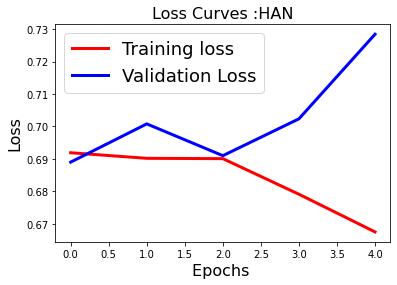

In [0]:
fig1 = plt.figure()
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :HAN',fontsize=16)
fig1.savefig('loss_han.png')
plt.show()

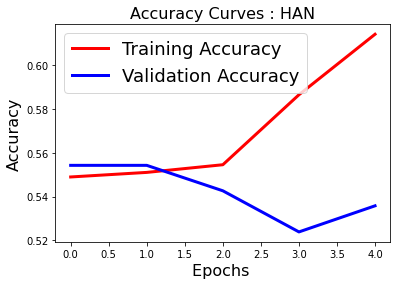

In [0]:
fig2=plt.figure()
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves : HAN',fontsize=16)
fig2.savefig('accuracy_han.png')
plt.show()

In [0]:
loss, accuracy = model.evaluate(x_test,y_test)
print('Test Loss: {}'.format(loss))
print('Test Accuracy: {}'.format(accuracy))